In [1]:
import numpy as np
 
from scipy import stats
import matplotlib.pyplot as plt
 
%matplotlib inline
 
np.random.seed(10)

In [2]:
male_mean= 178
male_sd= 7.7

In [3]:
female_mean = 163
female_sd = 7.3

In [4]:
male_height = stats.norm(male_mean,male_sd)
female_height=stats.norm(female_mean,female_sd)

In [5]:
def evaluate_pdf(rv,x=4):
  #evaluating the mean and sd of every random variable in our distribution
  mean=rv.mean()
  sd=rv.std()
  #using numpy to calculate the evenly spaced numbers over the specified interval
  xs=np.linspace(mean-x*sd,mean+x*sd)
  #calculate the peak of the normal distribution
  yx=rv.pdf(xs)
  return xs,yx

Text(0.5, 0, 'height (cm)')

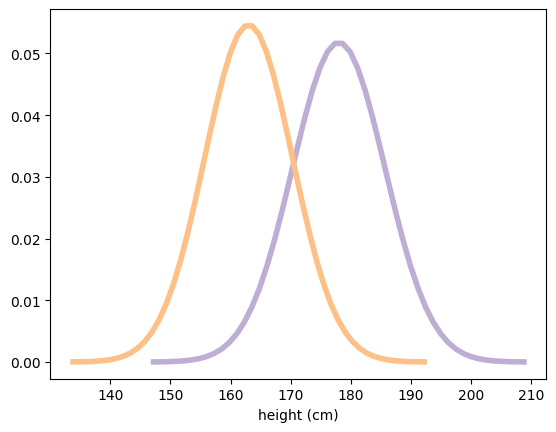

In [6]:
#Male height
xs, yx = evaluate_pdf(male_height)
plt.plot(xs, yx, label='male', linewidth=4, color='#beaed4') 
 
#Female height 
xs, yx = evaluate_pdf(female_height)
plt.plot(xs, yx, label='female', linewidth=4, color='#fdc086')
 
plt.xlabel('height (cm)')

In [7]:
male_sample= male_height.rvs(1000)
female_sample= female_height.rvs(1000)

In [9]:
mean1,sd1 = male_sample.mean(),male_sample.std()
mean1,sd1

(np.float64(177.88791390576085), np.float64(7.222274730410271))

In [10]:
mean2,sd2 = female_sample.mean(), female_sample.std()
mean2,sd2

(np.float64(162.91903182040372), np.float64(7.261850929417819))

In [11]:
mean_difference = mean1-mean2
mean_difference

np.float64(14.968882085357137)

In [ ]:
#quantifying the difference
#percentage of the mean ---relative 
#using the male sample mean
relative_difference= mean_difference/mean1
percentage_difference = relative_difference*100
percentage_difference

np.float64(8.414783082614122)

In [ ]:
#using the female sample mean
relative_difference2= mean_difference/mean2
percentage_difference2= relative_difference2*100
percentage_difference2

np.float64(9.18792722869745)

In [14]:
simple_overlap_ratio = (mean1+mean2)/2 
simple_overlap_ratio

np.float64(170.4034728630823)

In [15]:
overlap_ratio = (sd1*mean2+sd2*mean1)/(sd1+sd2)
overlap_ratio

np.float64(170.42392323303363)

In [18]:
#cohen's d function
def cohensd (group1,group2):
  difference_mean= group1.mean()-group2.mean()
  n1=len(group1)
  n2=len(group2)
  v1=group1.var()
  v2=group2.var()
  pooled_variance = (n1*v1+n2*v2)/(n1+n2)
  pooled_std= np.sqrt(pooled_variance)
  cohenssd= difference_mean/pooled_std
  return cohenssd

In [19]:
d=cohensd(male_sample,female_sample)
d

np.float64(2.0669285200851877)